# Introduction

Over a third of greenhouse gases emitted in Europe are related to buildings, and a third of that is the upfront embodied emissions from construction and manufacturing building materials. One way of limiting those emissions is to reuse already preowned building components before downcycling them. 

However, the design from preowned element differs from the typical design, since the avaialable elements have predefined dimensions and quantities, whereas new design gives freedom of choosing abstract elements of desired dimensions.

This research aims to develop a mapping algorithm that could assist designers in applying preowned elements while designing buildings.



### Task 
Given a set of elements coming from a design model - demand ($demand$), and another set of preowned elements - supply ($supply$), optimize the design, by minimizing Global Warming Potential ($gwp$). When necesarry, a new product ($new$) can be applied, depending on its performance.

Optimization should take into account:
*   technical feasibility - element can't be shorter or weaker than objective required by the design model ($demand$) 
*   minimization of Global Warming Potential ($gwp$), dependent on waste volume, transport distance and energy consuimng processes.
*   price, assuming that 
    * preowned elements also have their price
    * preowned elements are bought as whole elements, including scrape waste
    * scrap waste is not generating additional profit

# Theory


### Graph representation of the matching problem

Graphs ($G$) are sets of vertices ($V$) and edges ($E$) that connect them. 

$G(V,E)$ 

A **bipartite graph** (or bigraph) is a special type of graph, in which vertices can be divided into two disjoint and independent sets $U$ and $V$. Edges of such graph connect vertices in $U$ to one of vertices in $V$.

$G(U, V,E)$ 

Example of a bipartite graph:

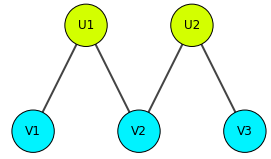

Matrix representation of a graph problem (above) can take a from of **adjacency matrix**, where each column $i$ corresponds to the same element in row $i$.

\begin{array}{|c|c|} \hline
 & 0 & 1 & 2 & 3 & 4 \\ \hline
0 & 0 & 0 & 1 & 1 & 0 \\ \hline
1 & 0 & 0 & 0 & 1 & 1 \\ \hline
2 & 1 & 0 & 0 & 0 & 0 \\ \hline
3 & 1 & 1 & 0 & 0 & 0 \\ \hline
4 & 0 & 1 & 0 & 0 & 0 \\ \hline
\end{array}

In **incidence matrix**, however, elements of one set are described by rows and another by columns. Here is the incidence matrhix of the same graph:  

\begin{array}{|c|c|} \hline
  & 2 & 3 & 4 \\ \hline
0 & 1 & 1 & 0 \\ \hline
1 & 0 & 1 & 1 \\ \hline
\end{array}

Incidence matrix can also represent **weights** of each edge:

\begin{array}{|c|c|} \hline
  & 2 & 3 & 4 \\ \hline
0 & 2.3 & 1.4 & 0 \\ \hline
1 & 0 & 3.0 & 0.9 \\ \hline
\end{array}

**Edmond's matrix** is a special type of incidence matrix, that instead of values shows indeterminates $x_{ij}$ for each edge. It's usefull to determine perfect matching.

\begin{array}{|c|c|} \hline
  & 2 & 3 & 4 \\ \hline
0 & x_{ij}  & x_{ij} & 0 \\ \hline
1 & 0 & x_{ij} & x_{ij} \\ \hline
\end{array}

# Input data

### Data structure

\begin{array}{|c|c|} \hline
TYPE  & NAME & DEFAULT & EXAMPLE & UNIT & COMMENT \\ \hline
General  & Length & - & 1.00 & m & ... \\ \hline
  & Area & - & 0.09 & m^2 & ... \\ \hline
  & Inertia\_moment & - & 0.000123 & m^4 & ... \\ \hline
  & Height & - & 0.30 & m & of a cross section \\ \hline
  & Material & - & Timber & - & ... \\ \hline
  & Density & timber - 500 / concrete - 2200 / steel - 7850 & 2350 & kg/m^3 & ... \\ \hline
Structural  & Imperfections & [\ \ ] & [0.15, 0.3, 0.7] & - & ...locations \\ \hline
  & Is\_column & No & Yes & - & ... \\ \hline
  & Utilization & - & 0.85 & - & Comming\ from\ FEM model. \\ \hline
Environmental  & Distance & - & 100.0 & km & ... \\ \hline
Other  & Price & - & 123 & € & ... \\ \hline
  & Group & - & 3 & - & int \\ \hline
  & Quality & 1.00 & 0.85 & - & ... \\ \hline
  & Is\_new & Yes & No & bool & New\ by\ default \\ \hline
\end{array}

### Abbreviations

$demand$ - demand, elements from the new design model.

$supply$ - Material supply (collection of preowned, available elements)

$LCA$ - Life Cycle Assessment - Global Warming Potential (GWP) expressed in kilograms of CO2 equivalent of all the emited green-house gases (kgCO2e). 

### Future considerations

* TODO we should explain the allocation method for LCA we select. Well described in (Eberhardt, 2020). I assumed for now the most common cut-off, and that we are at the second cycle (even though in Oslo it will be third). I just multiplied the new LCA for EPD product and multiplied by 7/90=0.0778. It is not the correct simplification! https://www.researchgate.net/publication/347002003_Development_of_a_Life_Cycle_Assessment_Allocation_Approach_for_Circular_Economy_in_the_Built_Environment

* TODO other EPDs have other numbers, for example Limtre has 760km distance, 33kg for A1-A3 and 3.2kg for A5: https://www.epd-norge.no/heltreprodukter/limtre-article3247-320.html 

* TODO we should consult the fossil vs bio approach to GWP calculation with LCA expert. In that EPD the difference is 28.9 vs -741 (2600% better)

* TODO we should consider implementing more parameters than just GWP:
  *  ODP Depletion potential of the stratospheric ozone layer;
  *  POCP Formation potential of tropospheric photochemical oxidants;
  *  AP Acidification potential of land and water;
  *  EP Eutrophication potential;
  *  ADPM Abiotic depletion potential for non fossil resources;
  *  ADPE Abiotic depletion potential for fossil resources


* TODO having many elements in one transport should be better than taking few from many places.

* TODO add custom dataframe class to store our elements, with own methods and attributes

      class FramingDF(pd.DataFrame):
          def __init__(self, *args, **kw):
              # do a standard initialization of Pandas dataframe:
              super(FramingDF, self).__init__(*args, **kw)
              # pluss added elements:
              pass

          def add_element(self, length):
              pass

      # sub-classes             
      class DemendDF(pd.DataFrame):
          pass

      class SupplyDF(pd.DataFrame):
          pass

### Assumptions

**Matching conditions**

$L_S>L_D$  - Length must be no shorter than designed.<br /> 
$A_S>A_D$  - Area must be no smaller than designed.<br /> 
$M_S>M_D$  - Moment of inertia must be no lesser than designed.<br /> 
$H_S>H_D$  - Height must be no shorter than designed.<br /> 

**Optimization objectives**

<!-- $P_{MIN}$  - Price should be minimized<br /> -->
Life Cycle Assessment should be minimized:<br />
$LCA= V * f_{GWP} $ <br />
where<br />
$V$ - volume of the material  <br />
$f_{GWP}$ - Global Warming Potential factor for stages A1-A3 (material production), which is assumed constant for new and preowned elements.

**LCA data assumptions**
* GWP A1-A3 value for new element is based on EPD: NEPD-3442-2053-EN, assuming only fossil emissions for a product. https://www.epd-norge.no/getfile.php/1324058-1653305090/EPDer/Byggevarer/Heltreprodukter/NEPD-3442-2053_Sawn-dried-timber-of-Spruce-and-Pine-with-an--average-moisture-content-of-16-.pdf
* GWP A1-A3 value for preowned element is based on multiplicator found in literature (Eberhardt, 2020)
* Both values are expressed in kilograms of CO2 equivalent for each cubic meter of that material [kgCO2eq/m3].

In [1]:
f_GWP_new = 28.9
f_GWP_old = f_GWP_new * 0.0778

### Generate input data

In [2]:
import pandas as pd
import numpy as np
import random

demand = pd.DataFrame(columns = ['Length', 'Area', 'Inertia_moment', 'Height'])
supply = pd.DataFrame(columns = ['Length', 'Area', 'Inertia_moment', 'Height', 'Is_new'])

# TODO add 'Distance'
# TODO add 'Price'
# TODO add 'Material'
# TODO add 'Density'
# TODO add 'Imperfections'
# TODO add 'Is_column'
# TODO add 'Utilisation'
# TODO add 'Group'
# TODO add 'Quality'
# TODO add 'Max_height' ?

In [3]:
# Add a perfect matching pair
demand.loc['D1'] = {'Length': 7.00, 'Area': 0.04, 'Inertia_moment':0.00013, 'Height': 0.20}
supply.loc['R1'] = {'Length': 7.00, 'Area': 0.04, 'Inertia_moment':0.00013, 'Height': 0.20, 'Is_new':False}

# Add non-matchable demand
demand.loc['D2'] = {'Length': 13.00, 'Area': 0.001, 'Inertia_moment':0.00001, 'Height': 0.05}

# Add non-matchable supply
supply.loc['R2'] = {'Length': 0.1, 'Area': 0.04, 'Inertia_moment':0.00013, 'Height': 0.20, 'Is_new':False}

# Add one with two good matches, where second slighlty better
demand.loc['D3'] = {'Length': 5.00, 'Area': 0.04, 'Inertia_moment':0.00013, 'Height': 0.20}
supply.loc['R3'] = {'Length': 5.20, 'Area': 0.042, 'Inertia_moment':0.00015, 'Height': 0.22, 'Is_new':False}
supply.loc['R4'] = {'Length': 5.10, 'Area': 0.041, 'Inertia_moment':0.00014, 'Height': 0.21, 'Is_new':False}

In [4]:
# Add new products for each demand element:
# for i in ...: 
#   supply.loc['N'+i] = {'Length': 5.00, 'Area': 0.04, 'Inertia_moment':0.00013, 'Height': 0.20}

for index, row in demand.iterrows():
  supply.loc['N'+index[1:]] = {'Length': row['Length'], 'Area': row['Area'], 'Inertia_moment': row['Inertia_moment'], 'Height': row['Height'], 'Is_new': True}
  
  # new_elem = generate_new(row['Length'], row['Area'])
  # append new element to the set:
  # new_set = new_set.append(new_elem, ignore_index = True)

In [5]:
demand

,Length,Area,Inertia_moment,Height
D1,7.0,0.040,0.00013,0.20
D2,13.0,0.001,0.00001,0.05
D3,5.0,0.040,0.00013,0.20


In [6]:
supply

,Length,Area,Inertia_moment,Height,Is_new
R1,7.0,0.040,0.00013,0.20,False
R2,0.1,0.040,0.00013,0.20,False
R3,5.2,0.042,0.00015,0.22,False
R4,5.1,0.041,0.00014,0.21,False
N1,7.0,0.040,0.00013,0.20,True
N2,13.0,0.001,0.00001,0.05,True
N3,5.0,0.040,0.00013,0.20,True


### Matching

Create `match_map` vector of matched ID's without values.

In [7]:
match_map = pd.DataFrame(None, index=demand.index.values.tolist() , columns=['Supply_id'] )
match_map

,Supply_id
D1,NaN
D2,NaN
D3,NaN


Create incidence matrix called `match_matrix`

In [8]:
match_matrix = pd.DataFrame(np.nan, index=demand.index.values.tolist() , columns=supply.index.values.tolist() )
match_matrix

,R1,R2,R3,R4,N1,N2,N3
D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# assign LCA but only when pass all the criteria: 
for i, D_row in demand.iterrows():
    for j, S_row in supply.iterrows():
        # find all matches that satisfy criteria
        if demand.loc[i]['Length'] <= supply.loc[j]['Length'] and demand.loc[i]['Area'] <= supply.loc[j]['Area'] and demand.loc[i]['Inertia_moment'] <= supply.loc[j]['Inertia_moment'] and demand.loc[i]['Height'] <= supply.loc[j]['Height']:
          # fill with LCA
          if supply.loc[j]['Is_new']:
            match_matrix.loc[i, j] = round(demand.loc[i]['Length']*supply.loc[j]['Area']*f_GWP_new, 2)
          else:
            match_matrix.loc[i, j] = round(demand.loc[i]['Length']*supply.loc[j]['Area']*f_GWP_old, 2)

match_matrix

,R1,R2,R3,R4,N1,N2,N3
D1,0.63,NaN,NaN,NaN,8.09,NaN,NaN
D2,NaN,NaN,NaN,NaN,NaN,0.38,NaN
D3,0.45,NaN,0.47,0.46,5.78,NaN,5.78


In [10]:
def apply_matching(d_id, s_id):
  # add to match_map:
  match_map.loc[d_id, 'Supply_id'] = s_id
  # remove already used:
  try:
    match_matrix.drop(d_id, inplace=True)
    match_matrix.drop(s_id, axis=1, inplace=True)
  except KeyError:
    pass

In [ ]:
# def purge_lonely(m):
#   # Eliminate rows with no match (meaning, that demand has element longer than longest in supply):
#   m.drop(m[m.sum(axis=1) == 0].index, inplace=True)
#   # Eliminate columns with no match (meaning that there are elements in supply shorter than shortest in demand):
#   m.drop(m.columns[m.sum() == 0], axis=1, inplace=True)

# def solo_match(match_matrix):
#   # Match if only one-to-one match
#   for index, row in match_matrix.iterrows():
#     if row.count() == 1:
#       found_id = row.idxmax()
#       apply_matching(index, found_id)
#   return found_id

In [ ]:
# purge_lonely(match_matrix)

In [ ]:
# solo_match(match_matrix)

In [11]:
match_map

,Supply_id
D1,NaN
D2,NaN
D3,NaN


**turn into graph**

In [12]:
!pip install igraph

In [23]:
import igraph as ig
import math
import matplotlib.pyplot as plt

In [97]:
def matrix_to_graph(demand, supply, match_matrix):
    vertices = [0] * len(demand.index) + [1] * len(supply.index) #['D1', 'D2', 'R1', 'R2']

    edges=[]
    weights=[]  # weights is the maximizing objective, in our case 1/LCA
    i = 0
    for index, row in match_matrix.iterrows():
      j = len(demand.index)
      for v in row:
        if v>0:
          edges.append((i,j))
          weights.append(round(1/v,2))
        j+=1
      i+=1

    graph = ig.Graph.Bipartite(
        vertices,
        edges
    )
    
    graph.es["label"] = weights
    graph.vs["label"] = list(demand.index)+list(supply.index) # vertice names
    
    return graph


def display_graph(graph):
    # TODO add display of matching
    fig, ax = plt.subplots(figsize=(20, 10))
    ig.plot(
        graph,
        target=ax,
        layout=graph.layout_bipartite(),
        vertex_size=0.4,
        vertex_label=graph.vs["label"],
        palette=ig.RainbowPalette(),
        vertex_color=[v*80+50 for v in graph.vs["type"]],
        edge_width=graph.es["label"],
        edge_label=[round(1/w,2) for w in graph.es["label"]]  # invert weight, to see real LCA
    )
    plt.show()


def best_matching(match_graph):
    # Match by finding one best coandidate 
    result = 0
    matching = ig.Graph.maximum_bipartite_matching(match_graph, weights=match_graph.es["label"])
    for match_edge in matching.edges():        
        apply_matching(match_edge.source_vertex["label"], match_edge.target_vertex["label"])
    return sum(matching.edges()["label"]) #LCA

In [98]:
match_graph = matrix_to_graph(demand, supply, match_matrix)

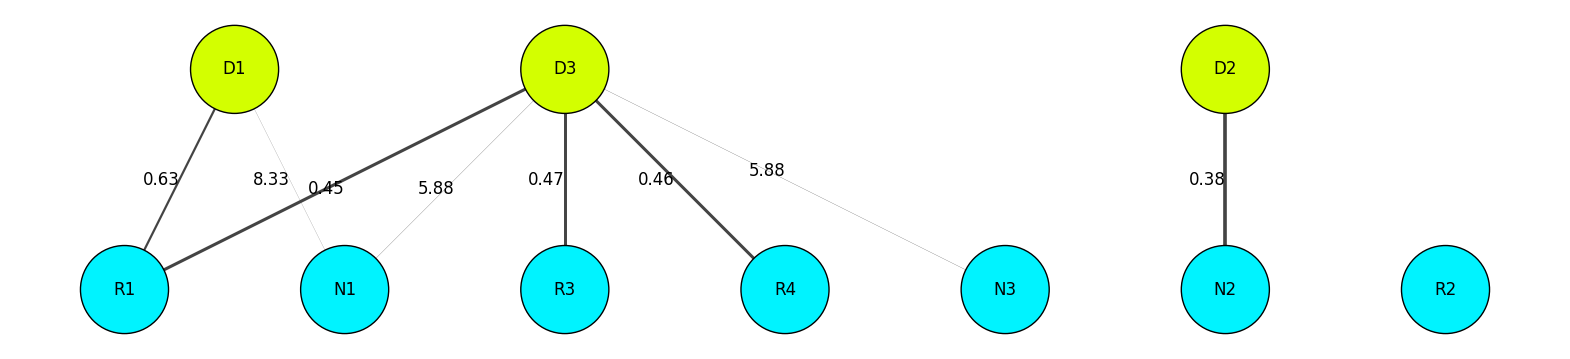

In [99]:
display_graph(match_graph)

In [100]:
best_matching(match_graph)

6.39

In [101]:
match_map

,Supply_id
D1,R1
D2,N2
D3,R4


___________________
# BELOW THIS LINE IS OLD CODE...
___________________


### Input assumptions
First assumption is that we only consider timber. Steel or concrete could yield more significant savings due to their high carbon footprint. 

In [ ]:
NEW_PRICE = 8000    # [NOK/m3], based on average from https://www.byggmax.no/catalogsearch/result/?q=KONSTRUKSJONSVIRKE
NEW_LCA_GWP_A1_A3 = 28.9 # [kgCO2e/m3], assuming 'fossil GWP' and 16% moisture, based on https://www.epd-norge.no/heltreprodukter/sawn-dried-timber-of-spruce-and-pine-with-an-average-moisture-content-of-16-article4098-320.html
NEW_LCA_GWP_A5 = 1.59   # [kgCO2e/m3], assuming 'fossil GWP' and 16% moisture, based on https://www.epd-norge.no/heltreprodukter/sawn-dried-timber-of-spruce-and-pine-with-an-average-moisture-content-of-16-article4098-320.html
NEW_DISTANCE = 100  # [km], maybe it should be variable e.g. 0-500km, based on https://www.epd-norge.no/heltreprodukter/sawn-dried-timber-of-spruce-and-pine-with-an-average-moisture-content-of-16-article4098-320.html

DENSITY = 491                 # [kg/m3], assuming 16% moisture, based on https://www.epd-norge.no/heltreprodukter/sawn-dried-timber-of-spruce-and-pine-with-an-average-moisture-content-of-16-article4098-320.html
TRANSPORT_LCA_GWP = 0.0318    # [kgCO2e/km], assuming 45% (90% and 0% back) utilisation of 34t truck, burning 0.027 l/tonkm (both ways), based on https://www.epd-norge.no/heltreprodukter/sawn-dried-timber-of-spruce-and-pine-with-an-average-moisture-content-of-16-article4098-320.html
# TRANSPORT_PRICE = ???       # [nok/tonkm], ?

MIN_LENGTH = 1.0    # [m]
MAX_LENGTH = 12.0   # [m]
MIN_AREA = 0.0025   # [m2], 5x5cm
MAX_AREA = 0.125    # [m2], 25x50cm

demand_COUNT = 5
supply_COUNT = 20

supply_DISTANCE = [50, 100, 150] # [km], random of this list that represents multiple preowned elements stocks 
supply_LCA_GWP_A1_A3 = NEW_LCA_GWP_A1_A3 * 0.0778     # [kgCO2e/m3], based on new product and factor derived from (Eberhardt, 2020)
supply_LCA_GWP_A5 = NEW_LCA_GWP_A5                    # [kgCO2e/m3], assuming it is the same as for new product
supply_PRICE = 4000         # [NOK/m3], based on Ormondroyd et al. (2016), where used beam 9"x1.5"x16ft costs 14gbp, so approximately 168 NOK, so a cubic meter appr. 4020nok. TODO: better analysis would be valuable.

### Generate pseudorandom sets of numbers
For the material supply:

In [ ]:
import pandas as pd
import random

random.seed(3)

supply = pd.DataFrame()
supply['Length'] = [x/10 for x in random.choices(range(int(MIN_LENGTH*10), int(MAX_LENGTH*10)), k=supply_COUNT)]        # [m], random between the range
supply['Area'] = supply.apply(lambda row: round((random.choice(range(0, int(MAX_AREA*10000)-int(MIN_AREA*10000))) /10000 /MAX_LENGTH * row['Length'] + MIN_AREA) * 10000)/10000, axis=1)        # [m2], random between the range but dependent on the length of the element
supply['Distance'] = supply.apply(lambda row: random.choice(supply_DISTANCE), axis=1)   # [km], random of possible distances
supply['Price'] = supply.apply(lambda row: round(row['Length'] * row['Area'] * supply_PRICE), axis=1)                          # [NOK], length * area * price (per m3)
supply['LCA_GWP'] = supply.apply(lambda row: round(row['Length'] * row['Area'] * (supply_LCA_GWP_A1_A3 + supply_LCA_GWP_A5)+ row['Distance'] * TRANSPORT_LCA_GWP * 10)/10, axis=1)    # [kgCO2e], length * area * processing_emissions + distance * transport_emissions  
supply['Weight'] = supply.apply(lambda row: round(row['Length'] * row['Area'] * DENSITY * 10)/10, axis=1)    # [kg], length * area * density

In [ ]:
supply

,Length,Area,Distance,Price,LCA_GWP,Weight
0,3.6,0.0064,50,92,1.6,11.3
1,6.9,0.0212,100,585,3.2,71.8
2,5.0,0.0529,150,1058,4.9,129.9
3,7.6,0.0080,100,243,3.2,29.9
4,7.8,0.0425,150,1326,4.9,162.8
5,1.7,0.0034,100,23,3.2,2.8
6,1.1,0.0076,100,33,3.2,4.1
7,10.2,0.0848,150,3460,5.1,424.7
8,3.8,0.0411,100,625,3.2,76.7
9,3.5,0.0256,150,358,4.8,44.0


Same for the design model:

In [ ]:
demand = pd.DataFrame()
demand['Length'] = [x/10 for x in random.choices(range(15, 100), k=demand_COUNT)]   # [m], random between 1.0 and 10.0 meters long
demand['Area'] = demand.apply(lambda row: round((random.choice(range(0, int(MAX_AREA*10000)-int(MIN_AREA*10000))) /10000 /MAX_LENGTH * row['Length'] + MIN_AREA)*10000)/10000, axis=1)        # [m2], random between the range but dependent on the length of the element
demand['Weight'] = demand.apply(lambda row: round(row['Length'] * row['Area'] * DENSITY *10)/10, axis=1)    # [kg], length * area * density

In [ ]:
demand

,Length,Area,Weight
0,9.9,0.0991,481.7
1,7.2,0.0724,255.9
2,2.8,0.0075,10.3
3,8.8,0.0342,147.8
4,9.6,0.0964,454.4


## Visualize the data

Show in 2D:

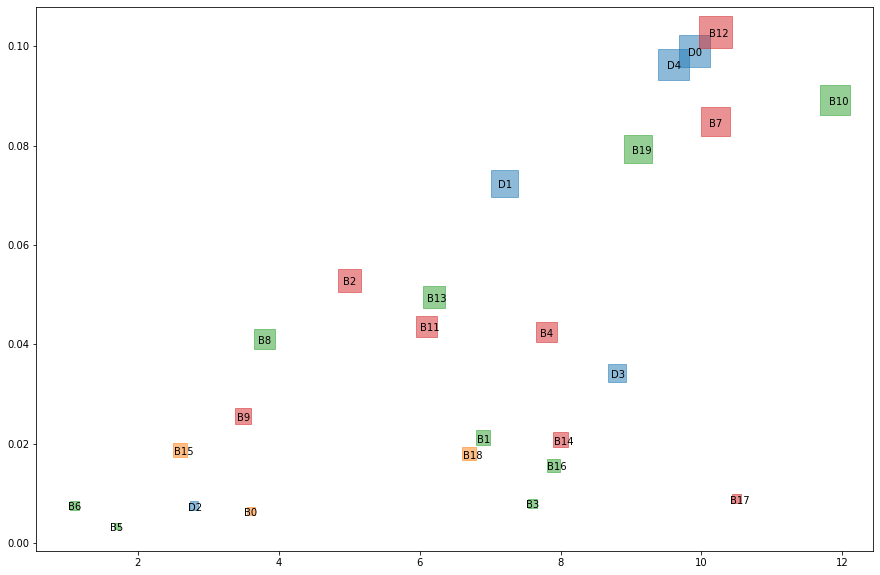

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

def plot_elements(demand=demand, supply=supply, new=pd.DataFrame()):
  fig = plt.figure()
  fig.set_size_inches(15, 10)
  plt.scatter(demand['Length'], demand['Area'], alpha=0.5, s=demand['Area']*10000, marker="s", label='Design need')
  for d in supply_DISTANCE:
    plt.scatter(supply[supply['Distance'] == d]['Length'], supply[supply['Distance'] == d]['Area'], alpha=0.5, s=supply[supply['Distance'] == d]['Area']*10000, marker="s", label=f'supply stock {d}km away')

  for i in range(demand.shape[0]): 
    plt.annotate(f'D{i}', (demand.loc[i, 'Length']-0.09, demand.loc[i, 'Area']-0.001))
  for i in range(supply.shape[0]): 
    plt.annotate(f'B{i}', (supply.loc[i, 'Length']-0.09, supply.loc[i, 'Area']-0.001))

  # show the mapping:
  if not new.empty:
    for new_index, new_row in new.iterrows():
      if new_row['supply_id']:
        # annotate elements to be reused
        plt.annotate("", xy=(demand.loc[new_index, 'Length'], demand.loc[new_index, 'Area']), xytext=(supply.loc[int(new_row['supply_id']),'Length'], supply.loc[int(new_row['supply_id']),'Area']),
                  arrowprops=dict(color='r', shrink=0.05, width=0.5))  
      else:
        # annotate new elements
        plt.annotate("NEW", xy=(new_row['Length']-0.16, new_row['Area']+0.0035), color='r')
        plt.plot(new_row['Length'], new_row['Area'], 'o', ms=30, mec='r', mfc='none', mew=2)

    plt.xlabel('Length [m]')
    plt.ylabel('Area [m2]')
    plt.title('Needed and available element sizes')
    plt.legend(loc="upper left")
    plt.show()

plot_elements(demand, supply)

If we don't consider cut waste, then both solutions [1] and [1] are equaly good. 

If cut waste is considered, then [1] is selected if assignment follows order from smallest to largest, and it produces less waste; [2] is selected if assignment follows order from largest to smallest. But there is a chance that approach [1] would result in largest element not finding it's equivalent (biggest loss).

2022-06-12 17_04_39-Beam mapping algorithms.ipynb - Colaboratory.png

Visualize elements in 3D

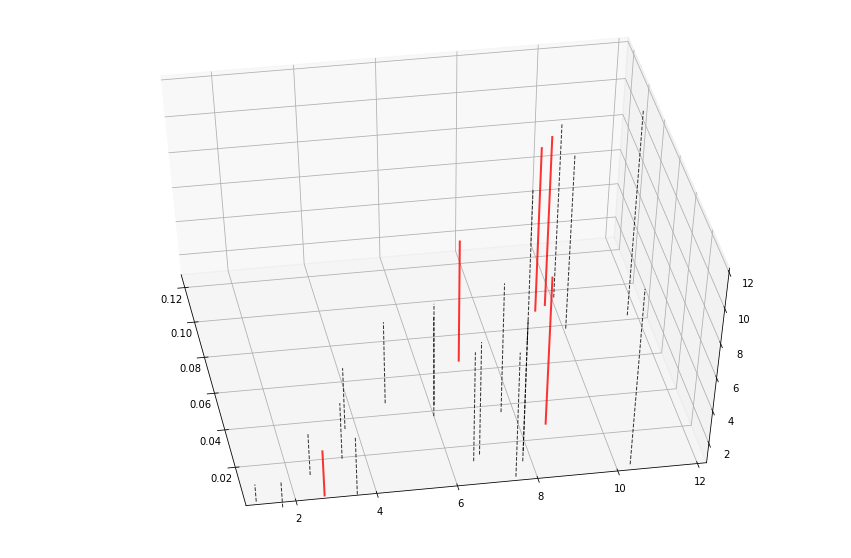

In [ ]:
fig = plt.figure()
fig.set_size_inches(15, 10)
ax = plt.axes(projection='3d')
ax.view_init(50, -10)

ax.set_xlim(MAX_AREA, MIN_AREA)
ax.set_ylim(MIN_LENGTH, MAX_LENGTH)
ax.set_zlim(MIN_LENGTH, MAX_LENGTH)

for i in range(supply.shape[0]):
    x = [supply.loc[i, 'Area'], supply.loc[i, 'Area']]
    y = [supply.loc[i, 'Length'], supply.loc[i, 'Length']]
    z = [0, supply.loc[i, 'Length']]
    ax.plot(x,y,z,'k--',alpha=0.8, linewidth=1)

for i in range(demand.shape[0]):
    x = [demand.loc[i, 'Area'], demand.loc[i, 'Area']]
    y = [demand.loc[i, 'Length'], demand.loc[i, 'Length']]
    z = [0, demand.loc[i, 'Length']]
    ax.plot(x,y,z, alpha=0.8, linewidth=2, color='red')

## Generate new elements
Allow for adding new (virgin) elements to the design

In [ ]:
def generate_new(length, area):
  random.seed(3)
  
  if not (type(length) == int or type(length) == float) and (type(area) == int or type(area) == float):
    raise Exception('Inputs to the function must be numbers')

  return pd.DataFrame(data={
    'Length':   length,         # [m]
    'Area':     area,           # [m2]
    'Distance': NEW_DISTANCE,   # [km]
    'Price':    round(NEW_PRICE * length * area),  # [NOK], length * area * price (per m3)
    'LCA_GWP':  round((length * area * (NEW_LCA_GWP_A1_A3 + NEW_LCA_GWP_A5) + NEW_DISTANCE * TRANSPORT_LCA_GWP)*10)/10,   # [kgCO2e], length * area * processing_emissions + distance * transport_emissions  
    'Weight':   round(length * area * DENSITY *10)/10,           # [kg]
    }, index=[0])

Verify by comparing supply element with new equivalent: 

In [ ]:
new_eq = generate_new(supply.loc[0, 'Length'], supply.loc[0, 'Area'])
print(f"First element in the supply is {round(100-supply.loc[0, 'Price']/new_eq.loc[0,'Price']*100)}% cheaper, and has {round(100-supply.loc[0, 'LCA_GWP']/new_eq.loc[0,'LCA_GWP']*100)}% less CO2, than new product of the same size.")

First element in the supply is 50% cheaper, and has 59% less CO2, than new product of the same size.


# Matching algorithms

## [NEW] Only new elements
This is our reference solution. All other solutions with reuse of preowned elements should outperform that reference.

In [ ]:
new_set = pd.DataFrame()

import time
start_time = time.time()

for index, row in demand.iterrows():
  new_elem = generate_new(row['Length'], row['Area'])
  #append new element to the set:
  new_set = new_set.append(new_elem, ignore_index = True)

new_time = time.time()-start_time
print(f"Execution time: {round(new_time*1000)/1000} sec.")

print(f"If constructed from only new products, the design would have LCA-GWP {round(new_set['LCA_GWP'].sum())} kgCO2e, cost {round(new_set['Price'].sum())} NOK, and weight {round(new_set['Weight'].sum())} kg.")

Execution time: 0.009 sec.
If constructed from only new products, the design would have LCA-GWP 100 kgCO2e, cost 21999 NOK, and weight 1350 kg.


In [ ]:
new_set

,Length,Area,Distance,Price,LCA_GWP,Weight
0,9.9,0.0991,100,7849,33.1,481.7
1,7.2,0.0724,100,4170,19.1,255.9
2,2.8,0.0075,100,168,3.8,10.3
3,8.8,0.0342,100,2408,12.4,147.8
4,9.6,0.0964,100,7404,31.4,454.4


Plot LCA of each element in the supply and new

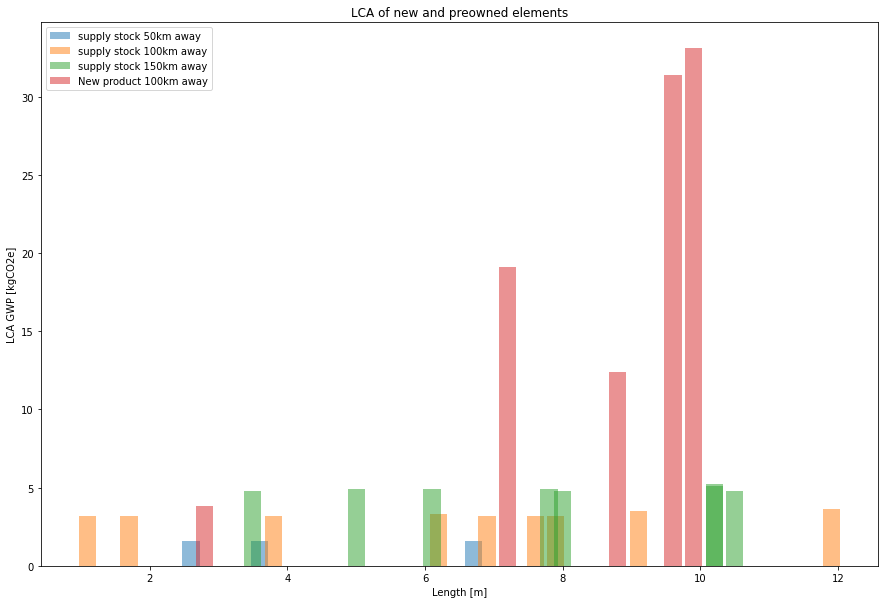

In [ ]:
fig = plt.figure()
fig.set_size_inches(15, 10)

for d in supply_DISTANCE:
  plt.bar(supply[supply['Distance'] == d]['Length'], supply[supply['Distance'] == d]['LCA_GWP'], alpha=0.5, label=f'supply stock {d}km away', width = 0.25)

plt.bar(new_set['Length'], new_set['LCA_GWP'], alpha=0.5, label=f'New product {NEW_DISTANCE}km away', width = 0.25)

plt.xlabel('Length [m]')
plt.ylabel('LCA GWP [kgCO2e]')
plt.title('LCA of new and preowned elements')
plt.legend(loc="upper left")
plt.show()

Plot price of each element in the supply and new

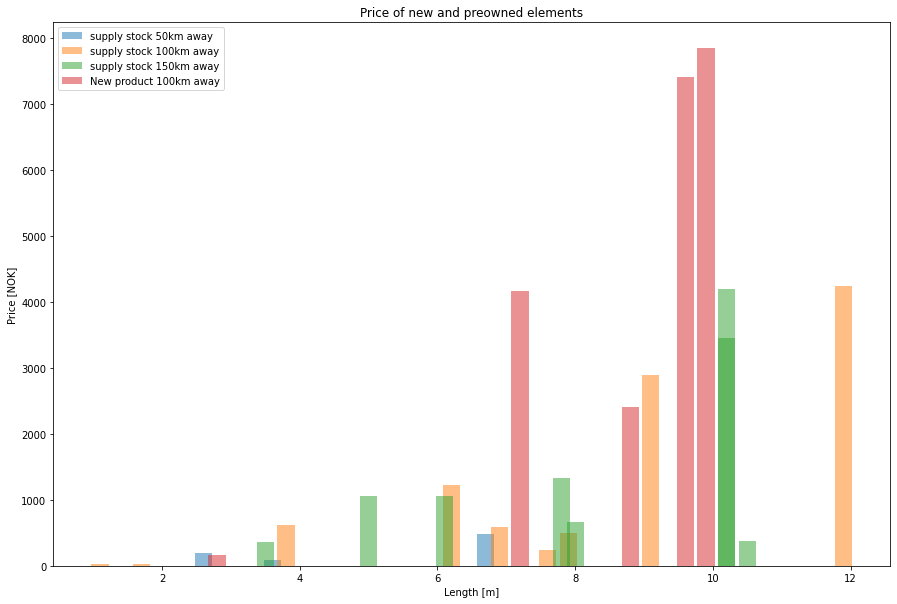

In [ ]:
fig = plt.figure()
fig.set_size_inches(15, 10)

for d in supply_DISTANCE:
  plt.bar(supply[supply['Distance'] == d]['Length'], supply[supply['Distance'] == d]['Price'], alpha=0.5, label=f'supply stock {d}km away', width = 0.25)

plt.bar(new_set['Length'], new_set['Price'], alpha=0.5, label=f'New product {NEW_DISTANCE}km away', width = 0.25)

plt.xlabel('Length [m]')
plt.ylabel('Price [NOK]')
plt.title('Price of new and preowned elements')
plt.legend(loc="upper left")
plt.show()

## [BFA] With brute force, ascending

Iterate through all the possibilities, and choose the best performing mapping.

In [ ]:
#measure time
import time
start_time = time.time()

# sort 'demand' and 'new_set' by volume, from smallest to largest: 
demand_sorted = demand.loc[(demand.Length * demand.Area).sort_values(ascending=True).index]
new_set_sorted = new_set.loc[(new_set.Length * new_set.Area).sort_values().index]

# Create dataframe by replacing according to the mapping:
bfa_set = new_set_sorted.copy()
bfa_set['supply_id'] = None
bfa_set['Cut_length'] = None

# TODO make sure that two identical elements won't get the same mapping (drop after each match)

for demand_index, demand_row in demand_sorted.iterrows():
  for supply_index, supply_row in supply.iterrows():
    # check feasibility:
    if supply_row['Length'] >= demand_row['Length'] and supply_row['Area'] >= demand_row['Area']:
      # check if element not already taken:
      if supply_index not in list(bfa_set['supply_id']):
        # check if both price and LCA are better than reference:
        if supply_row['Price'] <= new_set_sorted.loc[demand_index]['Price'] and supply_row['LCA_GWP'] <= new_set_sorted.loc[demand_index]['LCA_GWP']:
          # no mapping made yet:
          if not bfa_set.loc[demand_index, 'supply_id']:
            bfa_set.loc[demand_index, :] = supply_row.drop(labels=['Length']).append( pd.Series([supply_index, supply_row['Length']-demand.loc[demand_index,'Length']], index=['supply_id', 'Cut_length']) )
            bfa_set.loc[demand_index, 'Length'] = demand.loc[demand_index,'Length']
            bfa_set.loc[demand_index, 'Weight'] = bfa_set.loc[demand_index, 'Length'] * bfa_set.loc[demand_index, 'Area'] * DENSITY
          # new mapping is better:
          elif supply_row['Price'] <= supply.loc[bfa_set.loc[demand_index, 'supply_id']]['Price'] and supply_row['LCA_GWP'] <= supply.loc[bfa_set.loc[demand_index, 'supply_id']]['LCA_GWP']:
            bfa_set.loc[demand_index, :] = supply_row.drop(labels=['Length']).append( pd.Series([supply_index, supply_row['Length']-demand.loc[demand_index,'Length']], index=['supply_id', 'Cut_length']) )  
            bfa_set.loc[demand_index, 'Length'] = demand.loc[demand_index,'Length']
            bfa_set.loc[demand_index, 'Weight'] = bfa_set.loc[demand_index, 'Length'] * bfa_set.loc[demand_index, 'Area'] * DENSITY

bfa_time = time.time()-start_time
print(f"Execution time: {round(bfa_time*10000)/10000} sec.")

bfa_cut_weight = (bfa_set['Cut_length'] * bfa_set['Area']).sum() * DENSITY
print(f"\nBrute force achieved LCA-GWP {round(bfa_set['LCA_GWP'].sum())} kgCO2e, cost {round(bfa_set['Price'].sum())} NOK, and weight {round(bfa_set['Weight'].sum())} kg. It would also result in {round(bfa_cut_weight)} kg of scrap waste.\n\n")

bfa_set

Execution time: 0.0206 sec.

Brute force achieved LCA-GWP 58 kgCO2e, cost 17510 NOK, and weight 1405 kg. It would also result in 104 kg of scrap waste.




,Length,Area,Distance,Price,LCA_GWP,Weight,supply_id,Cut_length
2,2.8,0.0075,100,168,3.8,10.30000,None,None
3,8.8,0.0342,100,2408,12.4,147.80000,None,None
1,7.2,0.0793,100,2887,3.5,280.34136,19.0,1.9
4,9.6,0.1029,150,4198,5.2,485.02944,12.0,0.6
0,9.9,0.0991,100,7849,33.1,481.70000,None,None


In [ ]:
import json

demand.to_json(orient = 'columns')

'{"Length":{"0":9.9,"1":7.2,"2":2.8,"3":8.8,"4":9.6},"Area":{"0":0.0991,"1":0.0724,"2":0.0075,"3":0.0342,"4":0.0964},"Weight":{"0":481.7,"1":255.9,"2":10.3,"3":147.8,"4":454.4}}'

Visualize mapping

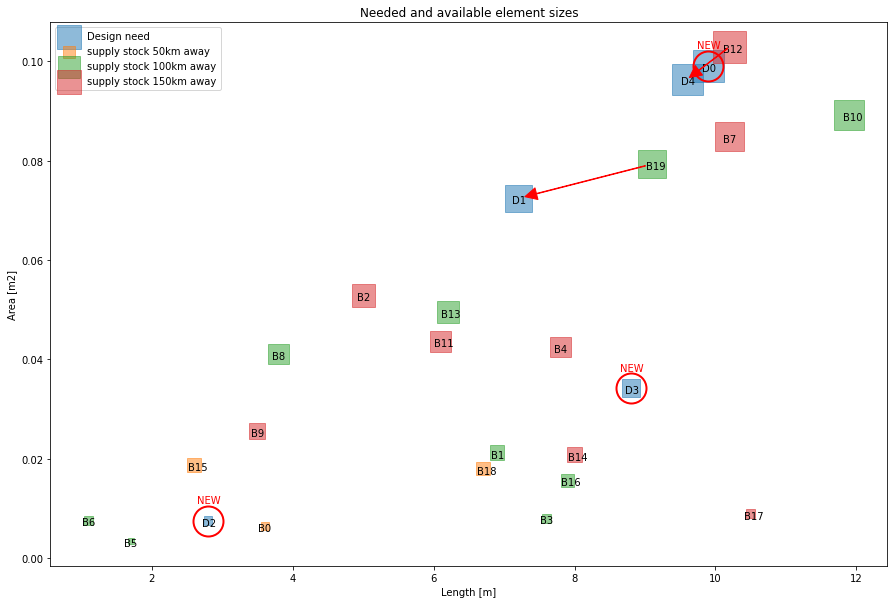

In [ ]:
plot_elements(demand, supply, bfa_set)

## [BFD] With brute force, descending

Iterate through all the possibilities, and choose the best performing mapping.

In [ ]:
#measure time
import time
start_time = time.time()

# sort 'demand' and 'new_set' by volume, from largest to smallest: 
demand_sorted = demand.loc[(demand.Length * demand.Area).sort_values(ascending=False).index]
new_set_sorted = new_set.loc[(new_set.Length * new_set.Area).sort_values().index]

# Create dataframe by replacing according to the mapping:
bfd_set = new_set_sorted.copy()
bfd_set['supply_id'] = None
bfd_set['Cut_length'] = None

# TODO make sure that two identical elements won't get the same mapping (drop after each match)

for demand_index, demand_row in demand_sorted.iterrows():
  for supply_index, supply_row in supply.iterrows():
    # check feasibility:
    if supply_row['Length'] >= demand_row['Length'] and supply_row['Area'] >= demand_row['Area']:
      # check if element not already taken:
      if supply_index not in list(bfd_set['supply_id']):
        # check if both price and LCA are better than reference (new):
        if supply_row['Price'] <= new_set_sorted.loc[demand_index]['Price'] and supply_row['LCA_GWP'] <= new_set_sorted.loc[demand_index]['LCA_GWP']:
          # no mapping made yet:
          if not bfd_set.loc[demand_index, 'supply_id']:
            bfd_set.loc[demand_index, :] = supply_row.drop(labels=['Length']).append( pd.Series([supply_index, supply_row['Length']-demand.loc[demand_index,'Length']], index=['supply_id', 'Cut_length']) )
            bfd_set.loc[demand_index, 'Length'] = demand.loc[demand_index,'Length']
            bfd_set.loc[demand_index, 'Weight'] = bfd_set.loc[demand_index, 'Length'] * bfd_set.loc[demand_index, 'Area'] * DENSITY
          # new mapping is better:
          elif supply_row['Price'] <= supply.loc[bfd_set.loc[demand_index, 'supply_id']]['Price'] and supply_row['LCA_GWP'] <= supply.loc[bfd_set.loc[demand_index, 'supply_id']]['LCA_GWP']:
            bfd_set.loc[demand_index, :] = supply_row.drop(labels=['Length']).append( pd.Series([supply_index, supply_row['Length']-demand.loc[demand_index,'Length']], index=['supply_id', 'Cut_length']) )  
            bfd_set.loc[demand_index, 'Length'] = demand.loc[demand_index,'Length']
            bfd_set.loc[demand_index, 'Weight'] = bfd_set.loc[demand_index, 'Length'] * bfd_set.loc[demand_index, 'Area'] * DENSITY

bfd_time = time.time()-start_time
print(f"Execution time: {round(bfd_time*10000)/10000} sec.")

bfd_cut_weight = (bfd_set['Cut_length'] * bfd_set['Area']).sum() * DENSITY
print(f"\nBrute force achieved LCA-GWP {round(bfd_set['LCA_GWP'].sum())} kgCO2e, cost {round(bfd_set['Price'].sum())} NOK, and weight {round(bfd_set['Weight'].sum())} kg. It would also result in {round(bfd_cut_weight)} kg of scrap waste.\n\n")

bfd_set

Execution time: 0.0171 sec.

Brute force achieved LCA-GWP 56 kgCO2e, cost 17065 NOK, and weight 1393 kg. It would also result in 89 kg of scrap waste.




,Length,Area,Distance,Price,LCA_GWP,Weight,supply_id,Cut_length
2,2.8,0.0075,100,168,3.8,10.30000,None,None
3,8.8,0.0342,100,2408,12.4,147.80000,None,None
1,7.2,0.0793,100,2887,3.5,280.34136,19.0,1.9
4,9.6,0.0964,100,7404,31.4,454.40000,None,None
0,9.9,0.1029,150,4198,5.2,500.18661,12.0,0.3


## [MAT] With matrix transformations

In [ ]:
demand

,Length,Area,Weight
0,9.9,0.0991,481.7
1,7.2,0.0724,255.9
2,2.8,0.0075,10.3
3,8.8,0.0342,147.8
4,9.6,0.0964,454.4


TEMPORARY MOCK! It imitates the perfect match for element no.2 from the design set.

In [ ]:
mock = pd.Series([2.9, 0.0078, 50, 100, 1, 10.3], index = supply.columns)
supply = supply.append(mock, ignore_index=True)
supply

,Length,Area,Distance,Price,LCA_GWP,Weight
0,3.6,0.0064,50.0,92.0,1.6,11.3
1,6.9,0.0212,100.0,585.0,3.2,71.8
2,5.0,0.0529,150.0,1058.0,4.9,129.9
3,7.6,0.0080,100.0,243.0,3.2,29.9
4,7.8,0.0425,150.0,1326.0,4.9,162.8
5,1.7,0.0034,100.0,23.0,3.2,2.8
6,1.1,0.0076,100.0,33.0,3.2,4.1
7,10.2,0.0848,150.0,3460.0,5.1,424.7
8,3.8,0.0411,100.0,625.0,3.2,76.7
9,3.5,0.0256,150.0,358.0,4.8,44.0


Create mapping vector, where None means that no mapping was made and new element should be applied:

In [ ]:
# zero's matrix:
mapping = pd.DataFrame(None, index=demand.index.values.tolist() , columns=['supply_id'] )
mapping

,supply_id
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


Create fitness matrix with 1's if MB element satisfies minimum length and area criteria.

In [ ]:
# zero's matrix:
m_geometry = pd.DataFrame(np.nan, index=demand.index.values.tolist() , columns=supply.index.values.tolist() )

# assign 1 when length pass the criteria: 
for i in range(m_geometry.shape[0]):
    for j in range(m_geometry.shape[1]):
        if demand.loc[i]['Length'] <= supply.loc[j]['Length'] and demand.loc[i]['Area'] <= supply.loc[j]['Area']:
          m_geometry.iloc[i,j] = 1

m_geometry

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Eliminate rows with no match (meaning, that demand has element longer than longest in supply):

In [ ]:
m_geometry.drop(m_geometry[m_geometry.sum(axis=1) == 0].index, inplace=True)
print(f"Eliminated {demand.shape[0] -  m_geometry.shape[0]} elements from the new design (matrix rows), for which no good match was found in the supply.")

Eliminated 0 elements from the new design (matrix rows), for which no good match was found in the supply.


Eliminate columns with no match (meaning that there are elements in supply shorter than shortest in demand):

In [ ]:
m_geometry.drop(m_geometry.columns[m_geometry.sum() == 0], axis=1, inplace=True)
print(f"Eliminated {supply.shape[0] -  m_geometry.shape[1]} elements from the supply (matrix columns), that were shorter than needed.")

m_geometry

Eliminated 4 elements from the supply (matrix columns), that were shorter than needed.


,1,2,3,4,7,8,9,10,11,12,13,14,16,17,18,19,20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For the remaining elements with 1 in the fittness matrix, we need to calculate waste:

In [ ]:
m_waste = pd.DataFrame(np.nan, index=m_geometry.index, columns=m_geometry.columns)
m_price = pd.DataFrame(np.nan, index=m_geometry.index, columns=m_geometry.columns)
m_lca = pd.DataFrame(np.nan, index=m_geometry.index, columns=m_geometry.columns)

for i, row in m_geometry.iterrows():
  for j in row.index:
    if row[j] == 1:
      # don't calculate if lca or price for new is lower:
      if new_set.loc[i, 'LCA_GWP'] > supply.loc[j]['LCA_GWP'] and new_set.loc[i, 'Price'] > supply.loc[j]['Price']:
        # cut length: 
        cut_length = supply.loc[j]['Length'] - demand.loc[i]['Length']
        m_waste.loc[i, j] = round(cut_length * supply.loc[j]['Area'], 3) # volume
        m_price.loc[i, j] = round(supply.loc[j]['Price'],3) # don't take into account that cut part can be sold  
        m_lca.loc[i, j] = round(supply.loc[j]['LCA_GWP'], 3) # don't take into account that cut part can be recycled

m_waste

,1,2,3,4,7,8,9,10,11,12,13,14,16,17,18,19,20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.031,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,0.254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.151,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.062,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Eliminate rows with no match (meaning, that demand has element longer than longest in supply) and columns with no match (meaning that there are elements in supply shorter than shortest in demand):

In [ ]:
m_geometry.drop(m_geometry[m_lca.sum(axis=1) == 0].index, inplace=True)
m_geometry.drop(m_geometry.columns[m_lca.sum() == 0], axis=1, inplace=True)

m_waste.drop(m_waste[m_lca.sum(axis=1) == 0].index, inplace=True)
m_waste.drop(m_waste.columns[m_lca.sum() == 0], axis=1, inplace=True)

m_price.drop(m_price[m_lca.sum(axis=1) == 0].index, inplace=True)
m_price.drop(m_price.columns[m_lca.sum() == 0], axis=1, inplace=True)

m_lca.drop(m_lca[m_lca.sum(axis=1) == 0].index, inplace=True)
m_lca.drop(m_lca.columns[m_lca.sum() == 0], axis=1, inplace=True)

m_waste

,7,12,19,20
0,NaN,0.031,NaN,NaN
1,0.254,NaN,0.151,NaN
2,NaN,NaN,NaN,0.001
4,NaN,0.062,NaN,NaN


Mapping cases.png

Apply mapping if only one match in a row and column:

In [ ]:
for index, row in m_waste.iterrows():
  if row.sum() == 1:
    # check if that column with only one item has only one value --> obvious match! 
    # .count()

# 
    # Before I had for whole matrix: if (m_geometry.sum(axis=1) == 1).sum() > 0:
    print('!!!!!! TODO here should be a mapping... !!!!!!!!!')
    # row_id = fit[fit.sum(axis=1) == 1].index[0]
    # col_id = fit.loc[row_id].idxmax()

    # mapping[row_id] = col_id
    # col_loc = MB_labels.index(col_id)
    # row_loc = ND_labels.index(row_id)
    # MB_updated[col_loc] = MB_updated[col_loc] - ND[row_loc]

    # fit.drop('D2', inplace=True)

If many rows share the same column and not any other column - select one with lowest waste

In [ ]:
# TODO

If multiple rows share multiple columns do the comparison

In [ ]:
# TODO

## Graphs

### Edmonds Matrix

image.png

image.png

There are still many basic open problems in this area.

Fast randomized algorithms for minimum s-t cut? 

Fast algebraic algorithms for weighted problems? 

Fast randomized algorithms for maximum flow? 

### The Hungarian Maximum Matching Algorithm

Also called the Kuhn-Munkres algorithm

https://iq.opengenus.org/hungarian-maximum-matching-algorithm/

Check the IGRAPH documentation
https://igraph.org/python/api/latest/

In [ ]:
!pip install igraph

In [ ]:
import igraph as ig

g = ig.Graph(edges=[[0, 1], [2, 3]])



In [ ]:
import random

random.seed(0)
g=ig.Graph.GRG(50, 0.15)

components = g.connected_components(mode='walk')

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ig.plot(
    components,
    target=ax,
    palette=ig.RainbowPalette(),
    vertex_size=0.05,
    vertex_color=list(map(int, ig.rescale(components.membership, (0, 200), clamp=True))),
    edge_width=0.7
  )
plt.show()

In [ ]:
!pip install igraph

In [ ]:
import igraph as ig
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
g = ig.Graph.Bipartite(
    [0, 0, 1, 1, 1],
    [(0, 2), (0, 3), (1, 3), (1, 4)]
)
assert g.is_bipartite()

In [ ]:
fig, ax = plt.subplots(figsize=(7, 3))
ig.plot(
    g,
    target=ax,
    layout=g.layout_bipartite(),
    vertex_size=0.4,
    vertex_label=['U1','U2','V1','V2','V3'],    #range(g.vcount()),
    palette=ig.RainbowPalette(),
    vertex_color=[50,50,130,130,130]
)
plt.show()

#### Adjacency matrix

In [ ]:
adjacency_matrix = g.get_adjacency()

In [ ]:
pd.DataFrame(adjacency_matrix)

#### Incidence matrix

In [ ]:
incidence_matrix = g.get_incidence()

In [ ]:
pd.DataFrame(incidence_matrix[0])

#### Edmond's matrix

### Weighted graphs

Dataframe to graph

In [ ]:
node_names = ['A', 'B', 'C']
a = pd.DataFrame([[1,2,3],[3,1,1],[4,0,2]], index=node_names, columns=node_names)

# Get the values as np.array, it's more convenenient.
A = a.values

# Create graph, A.astype(bool).tolist() or (A / A).tolist() can also be used.
g = ig.Graph.Adjacency((A > 0).tolist())

# Add edge weights and node labels.
g.es['weight'] = A[A.nonzero()]
g.vs['label'] = node_names  # or a.index/a.columns

Graph to dataframe

In [ ]:
df_from_g = pd.DataFrame(g.get_adjacency(attribute='weight').data,
                         columns=g.vs['label'], index=g.vs['label'])
(df_from_g == a).all().all()  # --> True

# Result comparison

In [ ]:
result = pd.DataFrame( 
    [
      [round(new_set['Price'].sum()), round(new_set['LCA_GWP'].sum()), round(new_set['Weight'].sum()), 0, round(new_time*1000)/1000],
      [round(bfa_set['Price'].sum()), round(bfa_set['LCA_GWP'].sum()), round(bfa_set['Weight'].sum()), round(bfa_cut_weight), round(bfa_time*1000)/1000],
      [round(bfd_set['Price'].sum()), round(bfd_set['LCA_GWP'].sum()), round(bfd_set['Weight'].sum()), round(bfd_cut_weight), round(bfd_time*1000)/1000],
      [round(bfdl_set['Price'].sum()), round(bfdl_set['LCA_GWP'].sum()), round(bfdl_set['Weight'].sum()), round(bfdl_cut_weight), round(bfdl_time*1000)/1000]
    ],
    index=["only new","brute force asc", "brute force desc"],
    columns = ["Price", "LCA_GWP", "Weight", "Cut_weight", "Exec.time"])

result

,Price,LCA_GWP,Weight,Cut_weight,Exec.time
only new,21999,100,1350,0,0.012
brute force asc,17510,58,1405,104,0.024
brute force desc,17065,56,1393,89,0.026


### Other approaches that could be tested:
- Pareto Front
- genetic algorithm (pygad)
- neural network
- decision trees
- linear programming (OR Tolls)